### Student Details

Student Name: Aryank Gupta

Student ID: 24101613

## Approach

To simulate the number of successful hits in target practice, I started by defining key parameters: the number of shots per practice session (15 shots), the total number of practice sessions (5,000 sessions), and the probability of hitting the target. For each practice session, I simulate the outcome of each shot using a random number generator where a hit is determined by comparing a randomly generated number to the probability of success.

On counting the number of successful hits in each set of 15 shots and running the simulation for 5,000 sessions I was able to gather a large dataset.
Finally, I plotted a histogram of the number of hits to visualize the distribution and analyze how frequently different numbers of successful hits occur.  

## Manual Calculations

(Provide details of the manual calculations)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Expected Number of Hits: 12.01
Standard Deviation of Hits: 2.20


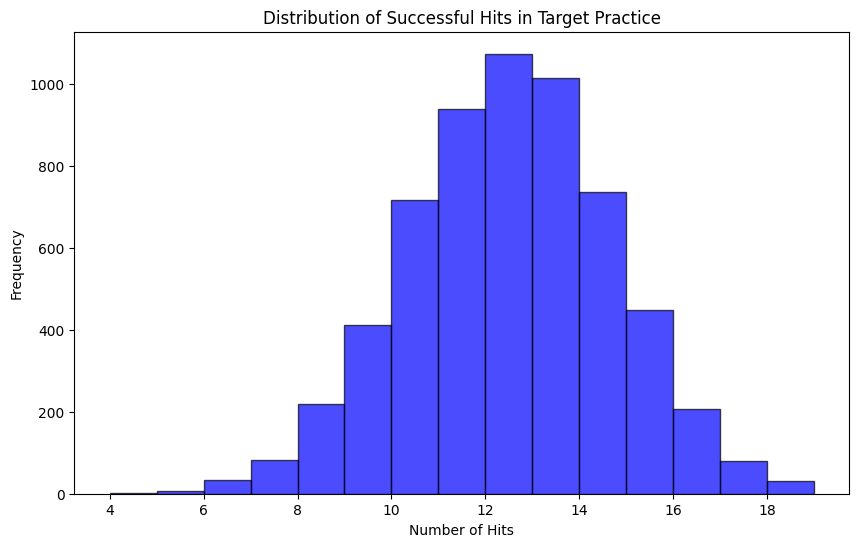

In [2]:
num_shots = 20
num_sessions = 6000
prob_hit = 0.6


def simulate_shots():
    return np.sum(np.random.rand(num_shots) < prob_hit)

hits_per_session = [simulate_shots() for _ in range(num_sessions)]

# Expected Values
expected_hits = np.mean(hits_per_session)
std_dev_hits = np.std(hits_per_session)

print(f"Expected Number of Hits: {expected_hits:.2f}")
print(f"Standard Deviation of Hits: {std_dev_hits:.2f}")

# Plotting the distribution of the number of hits
plt.figure(figsize=(10, 6))
plt.hist(hits_per_session, bins=range(min(hits_per_session), max(hits_per_session) + 1), color='Blue', edgecolor='black', alpha=0.7)
plt.title("Distribution of Successful Hits in Target Practice")
plt.xlabel("Number of Hits")
plt.ylabel("Frequency")
plt.show()


##Daily Temperature Change.

Considering this scenrio, I simulate daily temperature changes over a year (365 days), where temperature changes follow a normal distribution with a mean of 0 degrees Celsius and a standard deviation of 5 degrees Celsius.




##Approach

To simulate daily temperature changes over a long period, I started by defining the parameters for your simulation: the number of years to simulate ( 10,000 years), the number of days in each year ( 365 days), and the statistical properties of daily temperature changes (mean and standard deviation). To simulate daily temperature changes,I am generating random values from a normal distribution with the specified mean and standard deviation for each day of the year. After running the simulation, I calculated the mean and standard deviation of these average temperature changes to understand the central tendency and variability. Finally, I visualized the distribution of the average daily temperature changes using a histogram.

Average Daily Temperature with Trend - Expected Value: 15.00°C
Average Daily Temperature with Trend - Standard Deviation: 0.10°C


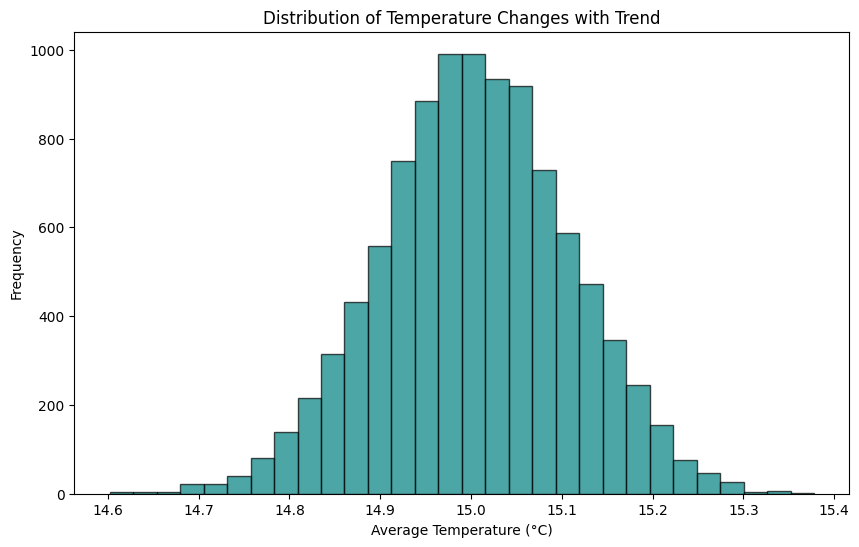

In [3]:
num_years = 10000
num_days = 365
initial_temp = 15
trend_per_year = 0.01
std_dev_temp_change = 2

def simulate_temperature_changes_with_trend():
    year = np.arange(0, num_days) / num_days
    warming_trend = trend_per_year * year
    daily_temp_changes = np.random.normal(0, std_dev_temp_change, num_days)
    return initial_temp + warming_trend + daily_temp_changes

temperature_changes = [np.mean(simulate_temperature_changes_with_trend()) for _ in range(num_years)]

# Calculate statistics
mean_temp = np.mean(temperature_changes)
std_dev_temp = np.std(temperature_changes)

print(f"Average Daily Temperature with Trend - Expected Value: {mean_temp:.2f}°C")
print(f"Average Daily Temperature with Trend - Standard Deviation: {std_dev_temp:.2f}°C")

# Plotting the distribution of temperature changes over the years
plt.figure(figsize=(10, 6))
plt.hist(temperature_changes, bins=30, color='teal', edgecolor='black', alpha=0.7)
plt.title("Distribution of Temperature Changes with Trend")
plt.xlabel("Average Temperature (°C)")
plt.ylabel("Frequency")
plt.show()


# Task 3: Naive Bayes Classifier

Data obtained from https://github.com/johnmyleswhite/ML_for_Hackers

In [4]:
# import dependencies
import numpy as np
import pandas

# Read the data from the .csv, using the first row as the headers of the data
data = pandas.read_csv('01_heights_weights_genders.csv',header=0)

# Show just the first few samples so we know it's read correctly
data.head(n=3)

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856


### Visualise

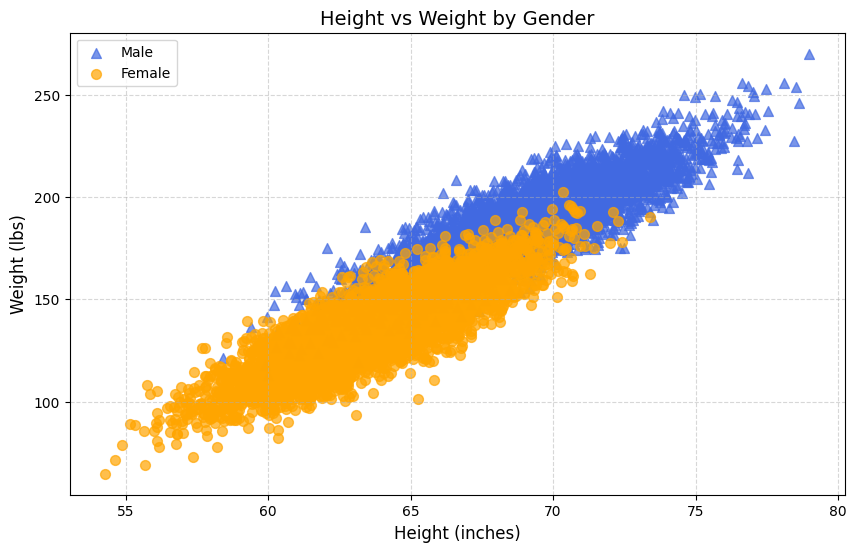

In [5]:
plt.figure(figsize=(10, 6))

plt.scatter(data['Height'][data['Gender'] == 'Male'],
            data['Weight'][data['Gender'] == 'Male'],
            color='royalblue', alpha=0.7, s=50, label='Male', marker='^')

plt.scatter(data['Height'][data['Gender'] == 'Female'],
            data['Weight'][data['Gender'] == 'Female'],
            color='orange', alpha=0.7, s=50, label='Female', marker='o')

plt.xlabel('Height (inches)', fontsize=12)
plt.ylabel('Weight (lbs)', fontsize=12)
plt.title('Height vs Weight by Gender', fontsize=14)

plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(loc='upper left')

# Show plot
plt.show()


###### Discuss: Do you think there is resonable separation?

### Features and labels
The aim is to predict the gender of the person based on characteristics such as height, weight. So we call what we want to predict the "label" and the characteristics the "features". This will be covered more later in the module, but is a good enough understanding for now.

In [6]:
features = data.iloc[:,1:3] # Height/Weight
target = data.iloc[:,0]   # Gender

### Train/Test Split

We have a bunch of data from the csv file. What we need to do is decide what of that data we will use to train the algorithm, and what of that data will be used to see how good the result is. More on this later in the module, but you can't use the same data you train with to test the outcome, as it will naturally fit that very well, but you won't catch things like overfitting.

There is some science to this, but for now we will randomly select one third for testing, and the rest for training.

In [7]:
from sklearn.model_selection import train_test_split
features = data[['Height', 'Weight']]
target = data['Gender']
train_features, test_features, train_labels, test_labels = train_test_split(features, target, test_size=0.33, random_state=2526)


### Train the algorithm
We won't go into the details here, but we will use a Gaussian Naive Bayesian. Use GaussianNB from sklearn to train the model. The Gaussian is needed as we're dealing with sparse, continuous data

In [8]:
from sklearn.naive_bayes import GaussianNB
genderModel = GaussianNB().fit(train_features, train_labels)

### Test the algorithm
Using the test data

In [9]:
from sklearn.metrics import accuracy_score

labelPred = genderModel.predict(test_features)
accuracy_score = accuracy_score(test_labels, labelPred)
print(f"GaussianNB Accuracy: {accuracy_score}")

GaussianNB Accuracy: 0.8909090909090909


### Plot the random samples

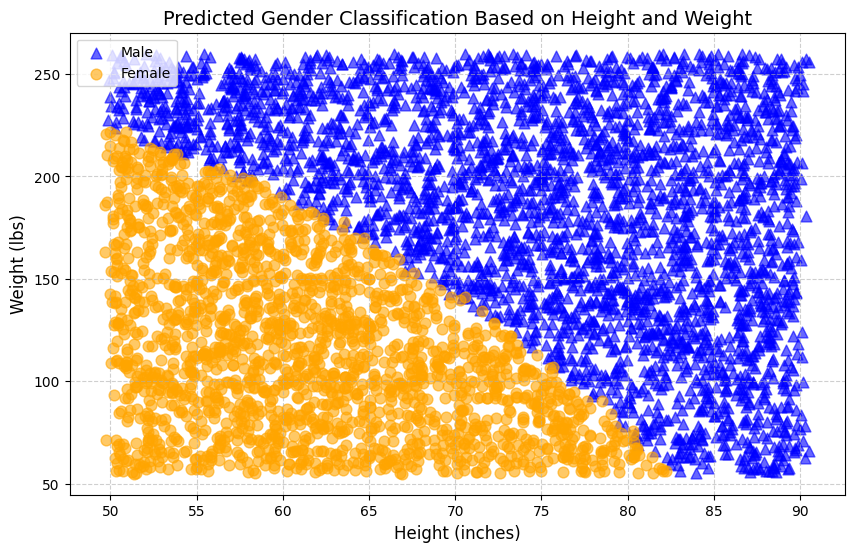

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

sample_heights = np.random.uniform(50, 90, 5000)
sample_weights = np.random.uniform(55, 260, 5000)
samples = pd.DataFrame({'Height': sample_heights, 'Weight': sample_weights})

predicted_genders = genderModel.predict(samples)

jitter = np.random.normal(0, 0.3, len(samples))

plt.figure(figsize=(10, 6))

plt.scatter(samples[predicted_genders == 'Male']['Height'] + jitter[predicted_genders == 'Male'],
            samples[predicted_genders == 'Male']['Weight'] + jitter[predicted_genders == 'Male'],
            color='blue', alpha=0.6, s=60, label='Male', marker='^')

plt.scatter(samples[predicted_genders == 'Female']['Height'] + jitter[predicted_genders == 'Female'],
            samples[predicted_genders == 'Female']['Weight'] + jitter[predicted_genders == 'Female'],
            color='orange', alpha=0.6, s=60, label='Female', marker='o')

plt.xlabel('Height (inches)', fontsize=12)
plt.ylabel('Weight (lbs)', fontsize=12)
plt.title('Predicted Gender Classification Based on Height and Weight', fontsize=14)

plt.grid(True, linestyle='--', alpha=0.6)

plt.legend(loc='upper left')

plt.show()
